**Goal:** to create a linear regression model that predicts the outcome for a tennis player based on their playing habits.
This was done by analyzing and modelling the Association of Tennis Professionals (ATP) data, and determining what it takes to be one of the best tennis players in the world based on it.


### Import Modules

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

### Explore Data


In [94]:
# load and investigate the data here:
df = pd.read_csv("tennis_stats.csv")
print(df.head())

                 Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2      

In [98]:
df.columns

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')

In [100]:
df.describe()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
mean,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000
max,2017.000000,0.880000,0.890000,0.480000,0.920000,0.750000,1185.000000,1.000000,507.000000,573.000000,...,0.560000,0.510000,916.000000,1.000000,0.820000,0.820000,48.000000,36.000000,1.074562e+06,1443.000000


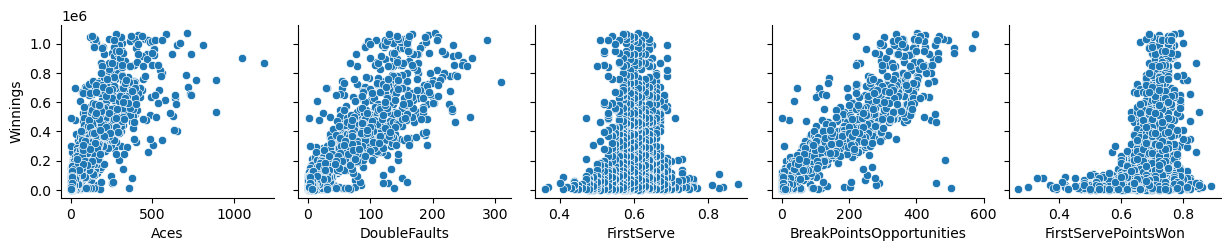

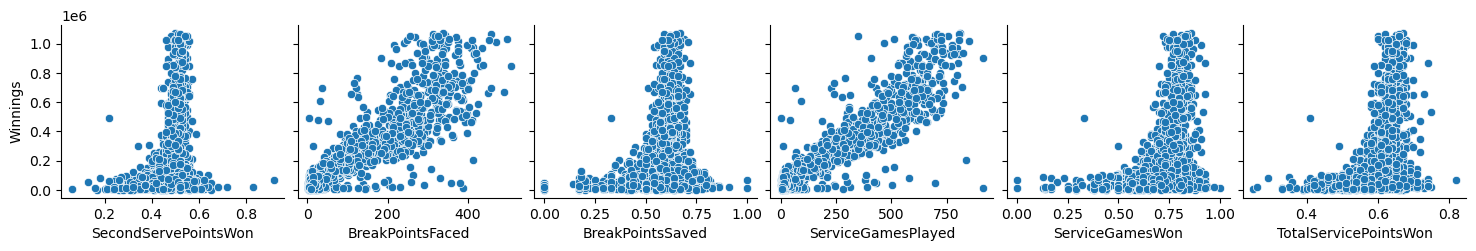

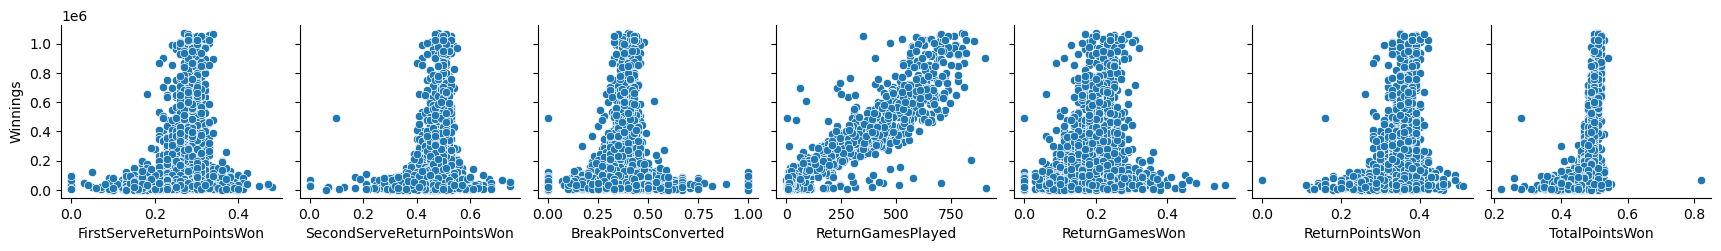

In [104]:
#EDA by plotting different features against the diff outcomes
#What relationships do you find between the features and outcomes? 
#Do any of the features seem to predict the outcomes?


#outcome 1 winnings
# Select features and outcome
features = ['Aces', 'DoubleFaults', 'FirstServe', 'BreakPointsOpportunities', 'FirstServePointsWon']

#put features in groups to clearly see the plots
features2 = ['SecondServePointsWon', 'BreakPointsFaced', 'BreakPointsSaved', 'ServiceGamesPlayed', 'ServiceGamesWon', 'TotalServicePointsWon']
features3 = ['FirstServeReturnPointsWon', 'SecondServeReturnPointsWon', 'BreakPointsConverted', 'ReturnGamesPlayed', 'ReturnGamesWon', 'ReturnPointsWon', 'TotalPointsWon'] 
outcome = 'Winnings'

# Create  pair plots
sns.pairplot(df, x_vars=features, y_vars=outcome,  kind='scatter')
plt.show()
sns.pairplot(df, x_vars=features2, y_vars=outcome,  kind='scatter')
plt.show()
sns.pairplot(df, x_vars=features3, y_vars=outcome,  kind='scatter')
plt.show()


From the plots above I can see a strong relationship between BreakPointsOpportunities and winnings, ServiceGamesPlayed and winnings, ReturnGamesPlayed and winnings.


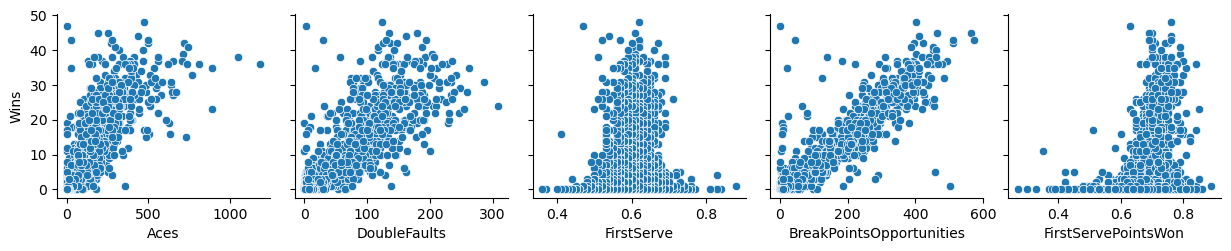

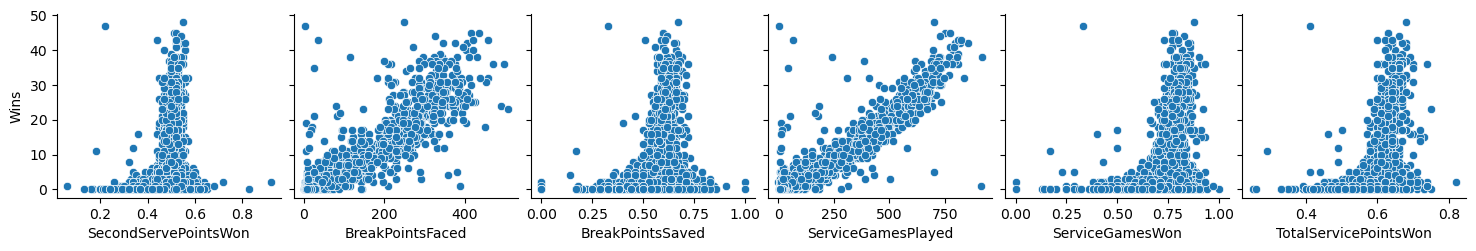

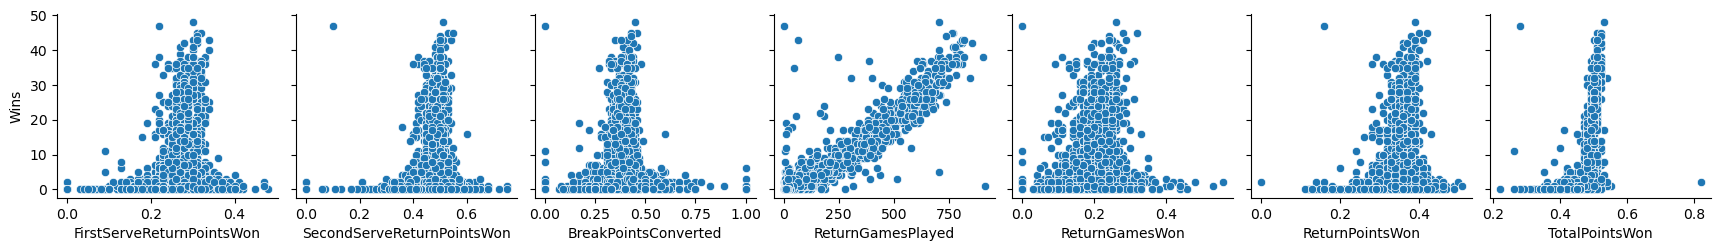

In [108]:
#outcome 2 Wins
outcome2 = 'Wins'

# Create a pair plots
sns.pairplot(df, x_vars=features, y_vars=outcome2,  kind='scatter')
plt.show()
sns.pairplot(df, x_vars=features2, y_vars=outcome2,  kind='scatter')
plt.show()
sns.pairplot(df, x_vars=features3, y_vars=outcome2,  kind='scatter')
plt.show()

Like for the winning column, there is a strong relationship between the features: BreakPointsOpportunities, BreakPointsFaced, ServiceGamesPlayed and returnGamesplayed with the outcome Wins.

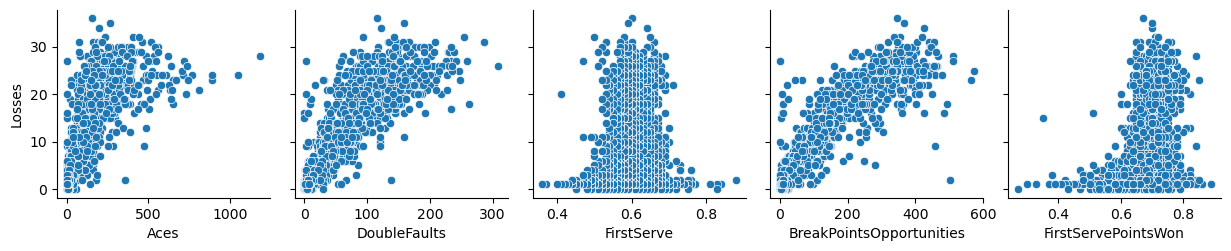

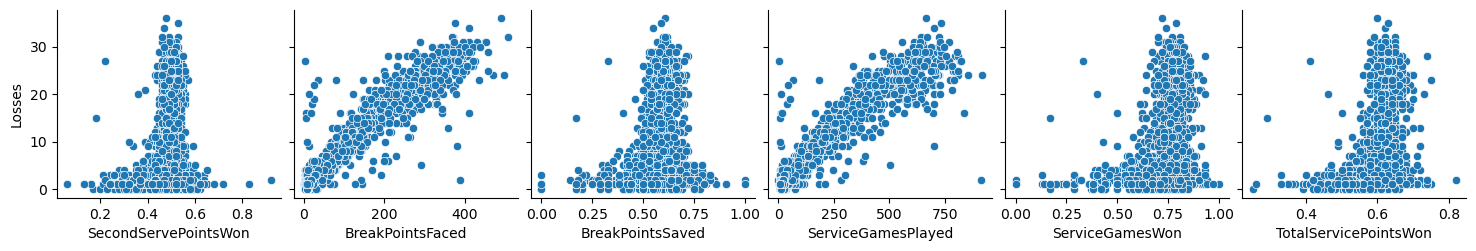

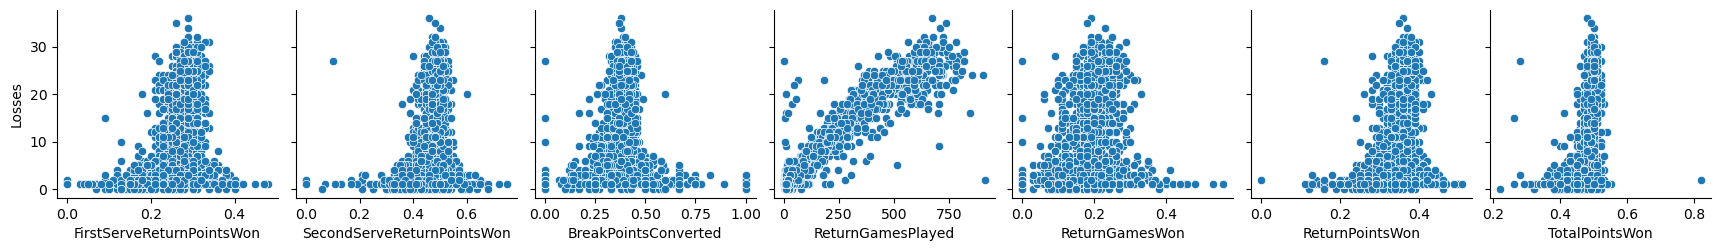

In [110]:
#Outcome 3 Losses
outcome3 = 'Losses'

# Create a pair plots
sns.pairplot(df, x_vars=features, y_vars=outcome3,  kind='scatter')
plt.show()
sns.pairplot(df, x_vars=features2, y_vars=outcome3,  kind='scatter')
plt.show()
sns.pairplot(df, x_vars=features3, y_vars=outcome3,  kind='scatter')
plt.show()

There may be a relationship between breakpointsfaced, servicegamesplayed and retunrgamesplayed.

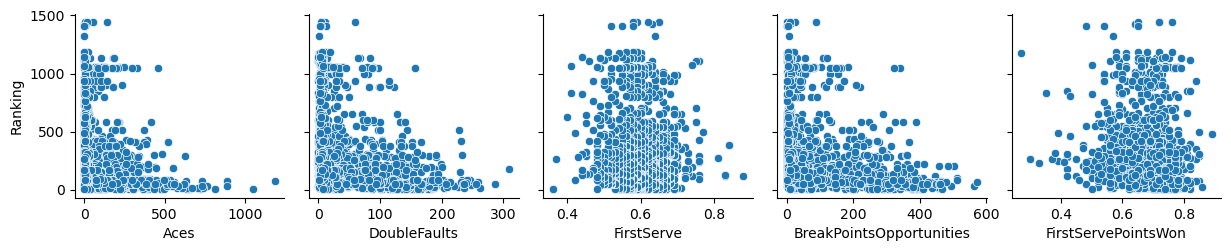

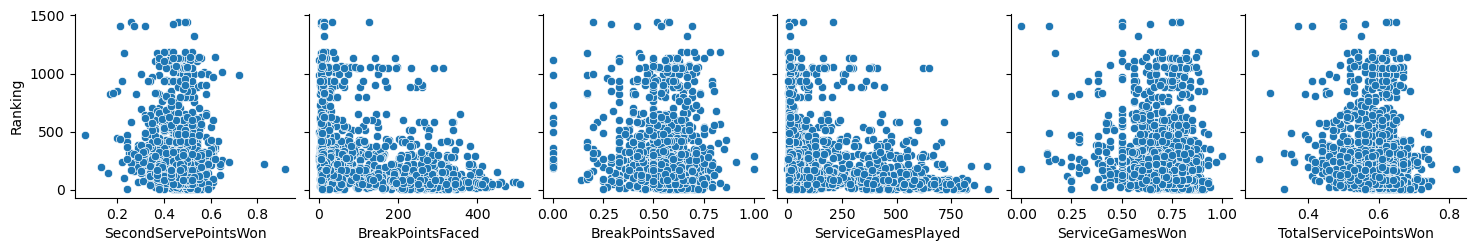

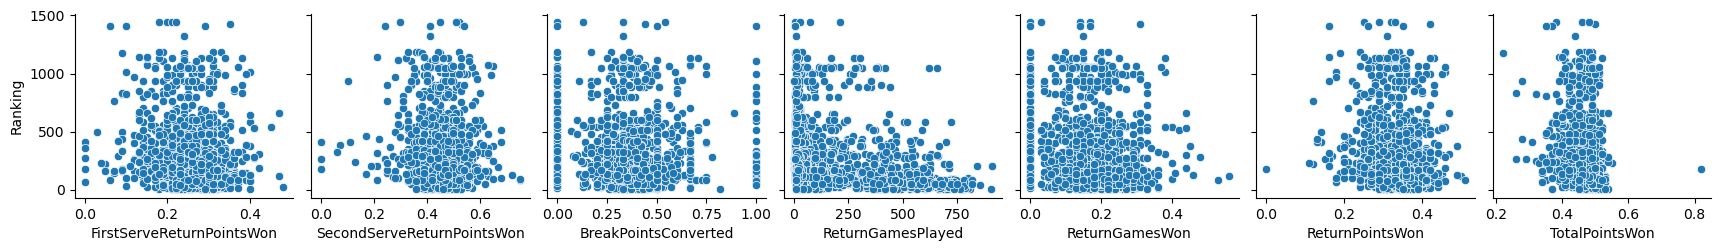

In [44]:
#Outcome 4 Ranking
outcome4 = 'Ranking'

# Create a pair plots
sns.pairplot(df, x_vars=features, y_vars=outcome4,  kind='scatter')
plt.show()
sns.pairplot(df, x_vars=features2, y_vars=outcome4,  kind='scatter')
plt.show()
sns.pairplot(df, x_vars=features3, y_vars=outcome4,  kind='scatter')
plt.show()

There seems to be no clear linear relationship between any of the features and rankings.

## Single Feature Linear Regression Model

Use one feature from the dataset to build a single feature linear regression model on the data. At this point, the model should use only one feature and predict one of the outcome columns. Before training the model, split the data into training and test datasets to evaluate the model on the test set. How does your model perform? Plot your model’s predictions on the test set against the actual outcome variable to visualize the performance.

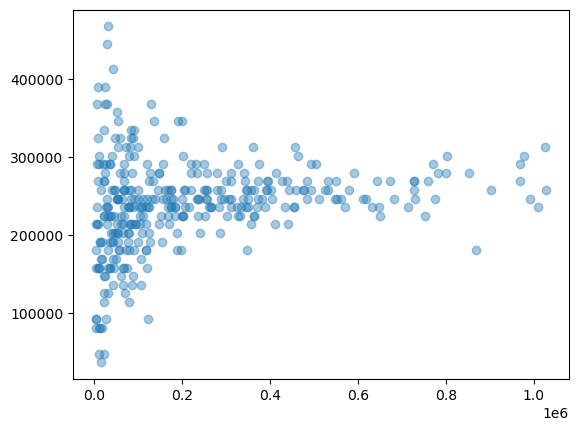

In [49]:
#Using FirstServeReturnPointsWon as a feature and Winnings as the outcome
Features = df[['FirstServeReturnPointsWon']]
Outcome = df[['Winnings']]
#created training and testing data
Features_train, Features_test, Outcome_train, Outcome_test = train_test_split(Features, Outcome, train_size=0.8, test_size=0.2)
#Created LinearRegression model and trained on the training data
model = LinearRegression()
model.fit(Features_train, Outcome_train) 
#scoring the model on the test data
model.score(Features_test, Outcome_test)
#predicted outcome based on model
Outcome_predict = model.predict(Features_test)

#Plot prediction against actual outcome
plt.scatter(Outcome_test,Outcome_predict, alpha=0.4)





The plot shows that the feature(FirstServeReturnPointWon) probably does not have a strong positive outcome which isn't surprising as in the earlier EDA plots there was no relationship between it and the outcome Winnings.

Created another single feature model using BreakPointsOpportunites

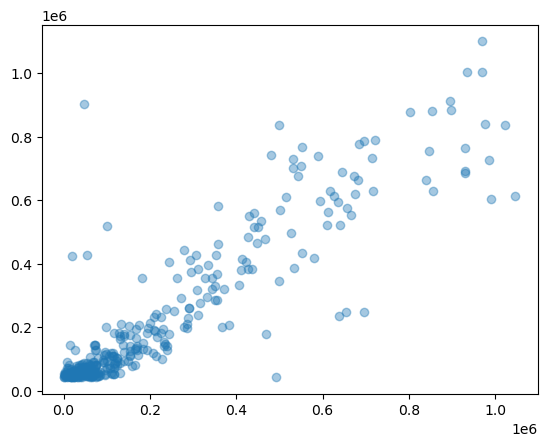

In [60]:
#Using BreakPointsOpportunities as a feature and Winnings as the outcome
Features = df[['BreakPointsOpportunities']]
Outcome = df[['Winnings']]
#created training and testing data
Features_train, Features_test, Outcome_train, Outcome_test = train_test_split(Features, Outcome, train_size=0.8, test_size=0.2)
#Created LinearRegression model and trained on the training data
model = LinearRegression()
model.fit(Features_train, Outcome_train) 
#scoring the model on the test data
model.score(Features_test, Outcome_test)
#predicted outcome based on model
Outcome_predict = model.predict(Features_test)

#Plot prediction against actual outcome
plt.scatter(Outcome_test,Outcome_predict, alpha=0.4)


## Two Feature Linear Regression Model


Create a few linear regression models that use two features to predict yearly earnings. Which set of two features results in the best model?

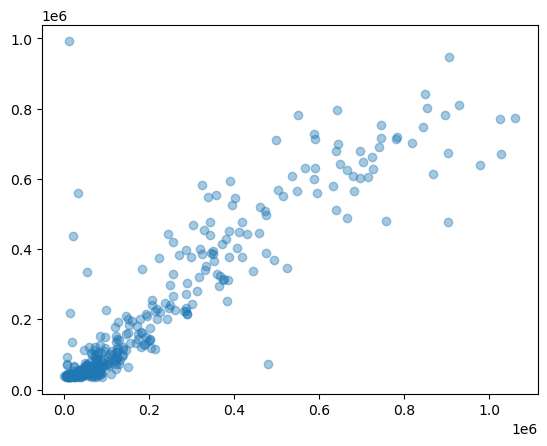

In [70]:

#Using BreakPointsOpportunities and ServiceGamesPlayed as a feature and Winnings as the outcome
Features = df[['BreakPointsOpportunities',
'ServiceGamesPlayed']]
Outcome = df[['Winnings']]
#created training and testing data
Features_train, Features_test, Outcome_train, Outcome_test = train_test_split(Features, Outcome, train_size=0.8, test_size=0.2)
#Created LinearRegression model and trained on the training data
model = LinearRegression()
model.fit(Features_train, Outcome_train) 
#scoring the model on the test data
model.score(Features_test, Outcome_test)
#predicted outcome based on model
Outcome_predict = model.predict(Features_test)

#Plot prediction against actual outcome
plt.scatter(Outcome_test,Outcome_predict, alpha=0.4)



## Multipe Features Linear Regression Model

Create a few linear regression models that use multiple features to predict yearly earnings. Which set of features results in the best model?

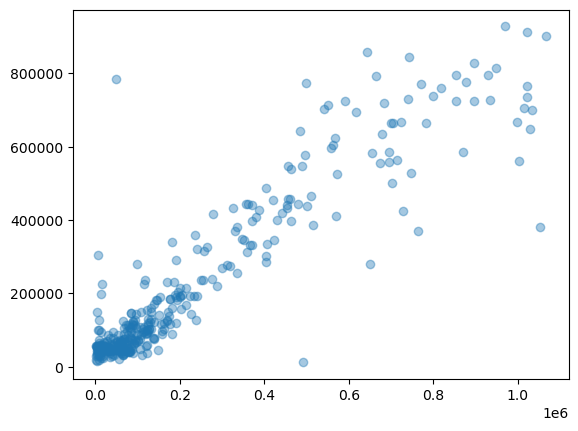

In [86]:
Features = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]

Outcome = df[['Winnings']]
#created training and testing data
Features_train, Features_test, Outcome_train, Outcome_test = train_test_split(Features, Outcome, train_size=0.8, test_size=0.2)
#Created LinearRegression model and trained on the training data
model = LinearRegression()
model.fit(Features_train, Outcome_train) 
#scoring the model on the test data
model.score(Features_test, Outcome_test)
#predicted outcome based on model
Outcome_predict = model.predict(Features_test)

#Plot prediction against actual outcome
plt.scatter(Outcome_test,Outcome_predict, alpha=0.4)


The plots of predicted versus actual outcomes with a diagonal line indicate that the model performs well. It shows a:

1. **Good Fit**: The predictions closely match the actual outcomes, suggesting that the model has captured the relationship between the features and the outcome effectively.

2. **High Accuracy**: A diagonal line implies that the predicted values are similar to the actual values, indicating high accuracy.

3. **Model Validity**: The model is likely valid and generalizes well to new data, assuming the test data is representative.

This is a positive result, showing that the chosen features and model are suitable for predicting the outcome. This can be further validated by checking performance metrics like \( R^2 \) or mean squared error.